**IS4226 Group 3 Final Project Strategy Notebook**
--

This notebook presents a comprehensive analysis of our group's selected systematic trading strategy. We've utilized a class function to meticulously model and organize the trading strategy, enhancing its adaptability and reusability for various strategies and stock selections. This approach offers a dynamic perspective, promoting scalability and adaptability across multiple trading scenarios and stock picks.

This notebook can be broken down into 4 sections:

> Section 1: This section focuses on package installation and the importation of crucial libraries.

> Section 2: This section focuses on the quantitative justifications for our stock selections.

> Section 3: This section introduces a central class that encompasses the primary functionalities of our systematic trading model.

> Section 4: This section delves into the strategy class, which houses the essential functions for initiating order execution.

> Section 5: This section is dedicated to the instantiation and parameter definition, which forms the primary input for our trading strategy.


### Section 1a: Installing the necessary packages

In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=46dfe7a196ec723da2ac011891a59cbe5b026ada16ef20e455d29868ddd95ab7
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


### Section 1b: Importing the necessary Python libraries

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns

from google.colab import drive
from ta.momentum import StochasticOscillator, RSIIndicator

sns.set_style("white")

### Section 2: Stock Selection

The stocks below are those that we have chosen in each industry based on good fundamentals between 2010-2016 (Section 2.1.1 in our report). We are now trying to analyse the stocks based on quantitative analysis. Our group has placed strong emphasis on selecting stocks with higher beta values.


We calculate our beta from 1 January 2010 to 31 December 2016, which coincides with our training period. The market benchmark that we used is SPDR S&P 500 ETF Trust (SPY). We then choose the stock with the highest beta value.


In [ ]:
all_stocks = {
    "Consumer Goods": {
        "The Estée Lauder Companies Inc.": "EL",
        "Target Corporation": "TGT",
        "The Home Depot Inc.": "HD",
    },
    "Technology": {
        "Apple Inc.": "AAPL",
        "Facebook": "META",
        "Amazon": "AMZN"
    },
    "Healthcare and Biotech": {
        "Pfizer Inc.": "PFE",
        "Merck & Co., Inc.": "MRK",
        "AbbVie Inc.": "ABBV"
    },
    "Renewable Energy": {
        "Brookfield Renewable Partners L.P.": "BEP",
        "SunPower Corporation": "SPWR",
        "Ormat Technologies": "ORA"
    },
    "Real Estate": {
        "Prologis": "PLD",
        "Simon Property Group": "SPG",
        "Equinix": "EQIX",
    },
    "Streaming": {
        "Netflix Inc.": "NFLX",
        "Walt Disney Co": "DIS",
        "Comcast Corporation": "CMCSA"
    }
}

In [ ]:
benchmark_symbol = "SPY"
start = "2010-01-01"
end = "2016-12-31"

In [ ]:
def BASS(stock_symbol, benchmark_symbol, start, end):
  df = pd.DataFrame()
  df['benchmark'] = yf.Ticker(benchmark_symbol).history(start=start, end=end).Close
  df['stock'] = yf.Ticker(stock_symbol).history(start=start, end=end).Close
  df['stock_returns'] = df['stock'].pct_change()
  df['benchmark_returns'] = df['benchmark'].pct_change()

  df = df.dropna()
  if len(df) == 0:
    raise Exception(f'ERROR:yfinance:{stock}: No timezone found, symbol may be delisted')

  # Beta calculations
  beta = round(
    df['benchmark_returns'].cov(df['stock_returns']) / df['benchmark_returns'].var(),
    2
  )

  # Calculate Alpha
  benchmark_yearly_returns = df['benchmark_returns'].mean() * 252
  stock_yearly_returns = df['stock_returns'].mean() * 252
  alpha = round(
    (stock_yearly_returns - beta * benchmark_yearly_returns) * 100,
    2
  )

  # Calculate Standard Deviation of stock
  std_dev = round(
    df['stock_returns'].std() * 100,
    2
  )

  # Calculate Sharpe Ratio of stock
  # SR = Mu / Sigma
  avg_returns = df['stock_returns'].mean()
  std = df['stock_returns'].std()
  daily_SR = avg_returns / std
  annual_SR = round(
    daily_SR * (252**0.5),
    2
  )
  return beta, alpha, std_dev, annual_SR

In [ ]:
# Calculate the BASS for each stock
bass_dictionary = {
    "start_date": [],
    "end_date": [],
    "industry": [],
    "stock": [],
    "symbol": [],
    "beta": [],
    "alpha": [],
    "std_dev": [],
    "annual_SR": []
}

for industry, stocks in all_stocks.items():
  if stocks == {}:
    continue
  else:
    for stock, stock_symbol in stocks.items():
      try:
        beta, alpha, std_dev, annual_SR = BASS(stock_symbol, benchmark_symbol, start, end)
        bass_dictionary['start_date'].append(start)
        bass_dictionary['end_date'].append(end)
        bass_dictionary['industry'].append(industry)
        bass_dictionary['stock'].append(stock)
        bass_dictionary['symbol'].append(stock_symbol)
        bass_dictionary['beta'].append(beta)
        bass_dictionary['alpha'].append(alpha)
        bass_dictionary['std_dev'].append(std_dev)
        bass_dictionary['annual_SR'].append(annual_SR)
      except Exception as e:
        print(f"No Data for stock: {stock}")

# Create a dataframe to house all the BASS data for the various stocks in STI Index
bass = pd.DataFrame(bass_dictionary, columns = bass_dictionary.keys())

# Sort the data by order of Sharpe Ratio
bass = bass.sort_values(by=['industry', 'beta'], ascending=False).reset_index(drop=True)
bass

,start_date,end_date,industry,stock,symbol,beta,alpha,std_dev,annual_SR
0,2010-01-01,2016-12-31,Technology,Amazon,AMZN,1.11,15.49,2.04,0.92
1,2010-01-01,2016-12-31,Technology,Facebook,META,1.03,16.54,2.53,0.79
2,2010-01-01,2016-12-31,Technology,Apple Inc.,AAPL,0.95,11.53,1.65,0.91
3,2010-01-01,2016-12-31,Streaming,Netflix Inc.,NFLX,1.04,42.67,3.61,0.98
4,2010-01-01,2016-12-31,Streaming,Walt Disney Co,DIS,1.04,7.07,1.36,0.95
5,2010-01-01,2016-12-31,Streaming,Comcast Corporation,CMCSA,0.98,11.58,1.37,1.11
6,2010-01-01,2016-12-31,Renewable Energy,SunPower Corporation,SPWR,1.84,-21.33,4.13,0.04
7,2010-01-01,2016-12-31,Renewable Energy,Ormat Technologies,ORA,1.11,-4.05,1.92,0.34
8,2010-01-01,2016-12-31,Renewable Energy,Brookfield Renewable Partners L.P.,BEP,0.65,4.44,1.51,0.54
9,2010-01-01,2016-12-31,Real Estate,Prologis,PLD,1.30,0.83,1.70,0.65


### Section 3: Common Class

In [ ]:
class Common_Class():
    def __init__(self, symbol, beta, start, end, interval, capital, transaction_cost, verbose):
        """
        Input: symbol, start, end, interval, capital, transaction_cost, verbose
        Output: Runs the prepare_data() initiation function to retrieve all relevant data for our
                systematic modelling process
        """
        # Initialize variables that are given in initalize function
        self.symbol = symbol                        # This parameter stores all our stocks
        self.start = start                          # Start date of our historical dataset
        self.end = end                              # End date of our historical dataset
        self.interval = interval                    # Time gap between successive datapoints
        self.capital = capital                      # Initial capital to begin with
        self.transaction_cost = transaction_cost    # Transaction cost for each trade made
        self.verbose = verbose

        # Additional variables that need to be stored
        self.initial_capital = capital              # Initial capital that we start with
        self.quantity = {}                          # A dict to log all the stocks held at a given point in time
        self.position = {}                          # A dict to log all the stock's position at a given point in time
        self.all_data = {}                          # A dict to house all our historical data
        self.stock_capital = {}                     # Total valuation of our stock holdings
        self.trades = 0                             # Counter that increments when a trade is made
        self.trade_data = pd.DataFrame(
            columns=["trade", "date", "position", "price", "symbol", "quantity", "capital"]
        )
        self.stored_data = pd.DataFrame()           # A dataframe that logs every transaction made
        self.prepare_data(beta)                     # Initialising function to prepare our data


    def prepare_data(self, beta):
        """
        Retrieves stock data for each stock in portfolio through invoking the Yahoo Finance API
        Input: Calls the self.symbol variable to retrieve all stock symbols
        Output: Stores the raw data for each stock in a dataframe, which will subsequently be
                nested in a dictionary variable called self.stock_capital
        """
        weight_array = np.divide(beta, sum(beta))
        for i in range(len(self.symbol)):
            symbol = self.symbol[i]
            stock_data =  yf.Ticker(symbol).history(
                start = self.start,
                end = self.end,
                interval = self.interval
            )
            stock_data["Return"] = np.log(stock_data["Close"] / stock_data["Close"].shift(1)) # Log return
            stock_data = stock_data.dropna()
            self.all_data[symbol] = stock_data[["High", "Low", "Close", "Return"]]
            self.quantity[symbol] = 0
            self.position[symbol] = 0

            self.stock_capital[symbol] = self.initial_capital * weight_array[i]


    def store_results(self, trade, date, position, price, symbol, quantity, capital):
        """
        Store trade details of each trade in a dataframe for reference
        Input: trade, date, position, price, symbol, quantity, capital
        Output: Concatenates the trade detail to our existing dataframe in self.stored_data
        """
        trade_detail = pd.DataFrame(
            {
                "trade": pd.Series(trade),
                "date": pd.Series(date),
                "position": pd.Series(position),
                "price": pd.Series(price),
                "symbol": pd.Series(symbol),
                "quantity": pd.Series(quantity),
                "capital": pd.Series(capital),
            }
        )
        self.stored_data = pd.concat([self.stored_data, trade_detail])


    def return_date_price(self, stock, bar):
        """
        Returns the date and prevailing price of the given asset given the index of the dataframe
        Input: stock, bar
        Output: date and price variables
        """
        date = str(self.all_data[stock].index[bar])[:10]
        price = self.all_data[stock].Close.iloc[bar]
        return date, price

    def realised_balance(self, bar, verbose=True):
        """
        Returns the realised balance at a particular index in the dataframe
        Input: bar, verbose
        Output: Our realised balance for a given date, which is simply our self.capital variable
        """
        date, _ = self.return_date_price(self.symbol[0], bar)
        if verbose:
          print("Date: {} | Realised Balance: {:0.2f}".format(date, self.capital))
        return self.capital


    def unrealised_balance(self, bar, verbose=True):
        """
        Returns capital that is held in stocks currently across the portfolio at a particular
        index of the dataframe
        Input: bar, verbose
        Output: Our unrealised balance for a given date
        """
        balance = 0
        for stock in self.symbol:
            date, price = self.return_date_price(stock, bar)
            balance += self.quantity[stock] * price
        if verbose:
          print("Date: {} | Unrealised Balance: {:0.2f}".format(date, balance))
        return balance


    def total_balance(self, bar, verbose=True):
        """
        Returns the sum of our portfolio value and our realised capital
        Input: bar, verbose
        Output: Our total balance for a given date
        """
        date, _ = self.return_date_price(self.symbol[0], bar)
        balance = self.realised_balance(bar, verbose) + self.unrealised_balance(bar, verbose)
        if verbose:
          print("Date: {} | Total Balance: {:0.2f}".format(date, balance))
        return balance


    def buy_order(self, stock, bar, quantity=None, dollar=None):
        """
        This function triggers a buy position for a given stock. With the necessary input into our
        function, this would compute the price and quantity (if applicable) for that given trade
        Input: stock, bar, quantity, dollar
        Output: Logging of transaction in the self.stored_data
        """
        date, price = self.return_date_price(stock, bar)
        if quantity == None:
            quantity = int(dollar / price)
        self.capital -= quantity * price  + self.transaction_cost
        self.stock_capital[stock] -= quantity * price + self.transaction_cost
        self.quantity[stock] += quantity
        self.trades += 1
        # Logs the buy order into a dataframe
        self.store_results(
            self.trades,                                                # An incremental value when we print stored_results df
            date,                                                       # Date at which the asset was bought
            self.position[stock],                                       # Buy symbol
            price,                                                      # Prevailing bid price
            stock,                                                      # Stock symbol
            quantity,                                                   # Qty bought
            self.quantity[stock] * price + self.stock_capital[stock]    # Total value of asset within portfolio
        )
        if self.verbose:
            print("Bought {} shares of {} at {:0.1f} per share worth {:0.1f} $".format(
                quantity, stock, price, quantity * price))
            self.total_balance(bar)


    def sell_order(self, stock, bar, quantity=None, dollar=None):
        """
        This function triggers a sell position for a given stock. With the necessary input into our
        function, this would compute the price and quantity (if applicable) for that given trade
        Input: stock, bar, quantity, dollar
        Output: Logging of transaction in the self.stored_data
        """
        date, price = self.return_date_price(stock, bar)
        if quantity == None:
            quantity = int(dollar / price)
        self.capital += quantity * price  - self.transaction_cost
        self.stock_capital[stock] += quantity * price - self.transaction_cost
        self.quantity[stock] -= quantity
        self.trades += 1
        # Logs the sell order into a dataframe
        self.store_results(
            self.trades,                                                # An incremental value when we print stored_results df
            date,                                                       # Date at which the asset was bought
            self.position[stock],                                       # Sell symbol
            price,                                                      # Prevailing bid price
            stock,                                                      # Stock symbol
            quantity,                                                   # Qty bought
            self.quantity[stock] * price + self.stock_capital[stock]    # Total value of asset within portfolio
        )
        if self.verbose:
            print("Sold {} shares of {} at {:0.1f} per share worth {:0.1f} $".format(
                quantity, stock, price, quantity * price))
            self.total_balance(bar)


    def last_trade(self, stock, bar):
        """
        This function is triggered when we are at the final date in our period of analysis.
        As we do not want to hold anymore long or short positions, we will close all trades and compute the final
        balance of our portfolio
        Input: stock, bar
        Output: Logging of final transaction in the self.stored_data
        """
        date, price = self.return_date_price(stock, bar)
        last_quantity = self.quantity[stock]
        self.capital += self.quantity[stock] * price
        self.stock_capital[stock] += self.quantity[stock] * price
        self.quantity[stock] = 0
        self.trades += 1
        # Logs the final trade into a dataframe
        self.store_results(
            self.trades,                                                # An incremental value when we print stored_results df
            date,                                                       # Date at which the asset was bought
            self.position[stock],                                       # Sell symbol
            price,                                                      # Prevailing bid price
            stock,                                                      # Stock symbol
            last_quantity,                                              # Final qty
            self.quantity[stock] * price + self.stock_capital[stock]    # Total value of asset within portfolio
        )
        if self.verbose:
            print("Closed open trades for {} shares of {} at {:0.1f} per share worth {:0.1f}".format(
                last_quantity, stock, price, last_quantity * price))
            self.total_balance(bar)

    # the remaining methods help to plot the figures needed to visualize the performance of the strategy
    def cumulative_returns_plot(self):
        fig, ax = plt.subplots(figsize=(9, 4))
        for stock in self.symbol:
            sns.lineplot(self.all_data[stock]['Return'].cumsum().apply(np.exp) - 1, label = '{}'.format(stock), linestyle='dashed')
        plt.title("Cumulative Returns of Portfolio Stocks (Individual)", fontsize=12, fontweight="bold")
        plt.ylabel("Regular Returns")
        plt.xlabel("")
        plt.legend()
        plt.show()


    def drawdown_plot(self):
        final_result_data = self.final_result_data.set_index("date")
        fig, ax = plt.subplots(figsize=(9, 4))
        sns.lineplot(final_result_data['gross_cum_returns'].dropna(), label='Cumulative Returns')
        sns.lineplot(final_result_data['cum_max'].dropna(), label='Cumulative Maximum')
        plt.title("Drawdown", fontsize=12, fontweight="bold")
        plt.ylabel("Regular Returns")
        plt.xlabel("")
        plt.legend()
        plt.show()


    def strategy_returns_histogram(self):
        final_result_data = self.final_result_data.set_index("date")
        sns.set_style("whitegrid")
        fig, ax = plt.subplots(figsize=(9, 4))
        sns.histplot(final_result_data["log_returns"], bins=50, label="Strategy Returns", linestyle="dashed")
        plt.title("Histogram of Strategy Returns", fontsize=12, fontweight="bold")
        plt.ylabel("Count")
        plt.xlabel("Log Returns")
        plt.legend()
        plt.show()
        sns.set_style("white")


    def strategy_vs_benchmark_plot(self):
        final_result_data = self.final_result_data.set_index("date")
        fig, ax = plt.subplots(figsize=(9, 4))
        sns.lineplot(final_result_data['gross_cum_returns'].dropna(), label='Strategy Cumulative Returns')
        sns.lineplot(final_result_data["market_gross_cum_returns"].dropna(), label="Benchmark Returns", color="green", linestyle="dashed")
        sns.lineplot(final_result_data['Total_Stock_Returns_cum_sum'], color='red', label="Equal weighted stock returns", linestyle='dashed')
        plt.title("Strategy vs Market")
        plt.xlabel("")
        plt.ylabel("Regular Returns")
        plt.legend()
        plt.show()

### Section 4: Strategy Class

In [ ]:
class RSI_SOI_Strategy(Common_Class):
    def __init__(self, symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose):
        """
        An init function that is invoked to prepare our data and initialise all variables to be used in our
        strategy and systematic modelling process
        Input: symbol, benchmark, start, end, interval, capital, transaction_cost, verbose
        Output: Invoking of our common class init function
        """
        self.strategy_daily_capital = pd.DataFrame(columns=["date", "capital"])
        self.benchmark = benchmark
        super().__init__(symbol, beta, start, end, interval, capital, transaction_cost, verbose)

        self.winning_losing_positions = {"winning": {"long": {symbol: 0 for symbol in self.symbol},
                                                     "short": {symbol: 0 for symbol in self.symbol}},
                                         "losing": {"long": {symbol: 0 for symbol in self.symbol},
                                                    "short": {symbol: 0 for symbol in self.symbol}},
                                         "neutral": {"long": {symbol: 0 for symbol in self.symbol},
                                                     "short": {symbol: 0 for symbol in self.symbol}}}


    def set_strategy_parameters(
            self,
            n_consec_days,
            rsi_window,
            rsi_ob,
            rsi_os,
            soi_window,
            soi_ob,
            soi_os,
            days_to_hold,
            take_profit,
            stop_loss
        ):
        """
        Defines our strategy parameters that will be used in our systematic modelling and backtesting process
        Input: n_consec_days, rsi_ob, rsi_os, soi_ob, soi_os, days_to_hold, take_profit, stop_loss
        Output: Stores computed data in our parameter self.all_data
        """
        self.days_to_hold = days_to_hold
        self.take_profit = take_profit
        self.stop_loss = stop_loss
        self.days_left_in_position = {}
        for stock in self.symbol:
            stock_data = self.all_data[stock].copy()
            stock_data["Price Diff"] = stock_data["Close"].diff()
            stock_data["Consecutive Price Increase"] = stock_data["Price Diff"].rolling(n_consec_days-1).apply(lambda x: all(x >= 0))
            stock_data["Consecutive Price Decrease"] = stock_data["Price Diff"].rolling(n_consec_days-1).apply(lambda x: all(x <= 0))
            stock_data["Consecutive Price Increase"].fillna(0, inplace=True)
            stock_data["Consecutive Price Decrease"].fillna(0, inplace=True)

            # Deriving our RSI Indicator
            rsi_indicator = RSIIndicator(
                close = stock_data["Close"],
                window = rsi_window
            )
            stock_data["RSI"] = rsi_indicator.rsi()
            stock_data["Overbought (RSI)"] = np.where(stock_data["RSI"] >= rsi_ob, 1, 0)
            stock_data["Oversold (RSI)"] = np.where(stock_data["RSI"] <= rsi_os, 1, 0)

            # Deriving our SOI Indicator
            soi_indicator = StochasticOscillator(
                high = stock_data["High"],
                low = stock_data["Low"],
                close = stock_data["Close"],
                window = soi_window
            )
            stock_data["SOI"] = soi_indicator.stoch_signal()
            stock_data["Overbought (SOI)"] = np.where(stock_data["SOI"] >= soi_ob, 1, 0)
            stock_data["Oversold (SOI)"] = np.where(stock_data["SOI"] <= soi_os, 1, 0)

            # Criteria for our position on a given stock
            # To trigger a long position 2 conditions need to be filled
            #   a) There must be a consecutive price increase for our given stock at the given date of analysis
            #   b) SOI or RSI must be in the overbought region
            # If the long position is not triggered, then we will need to check if the following 2 conditions
            # are met
            #   a) Consecutive Price Decrease for our given stock at the given date of analysis
            #   b) RSI or SOI in oversold region
            # If the above conditions are met, we will trigger a short position
            # If none of the previous 2 scenarios were fulfilled, then we do not hold any position in the stock
            stock_data["Position"] = np.where(
                (stock_data["Consecutive Price Increase"] == 1) & \
                ((stock_data["Overbought (RSI)"] == 1) | (stock_data["Overbought (SOI)"] == 1)),
                1,
                np.where(
                    (stock_data["Consecutive Price Decrease"] == 1) & \
                    ((stock_data["Oversold (RSI)"] == 1) | (stock_data["Oversold (SOI)"] == 1)),
                -1,
                0)
            )
            self.all_data[stock] = stock_data.dropna()
            self.days_left_in_position[stock] = 0


    def store_ending_capital_for_day(self, bar):
        """
        This function is used to log our daily capital after every trading day. The data will eventually be
        used to calculate our portfolio metrics and plotting of strategy performance
        Input: bar
        Output: Storage of daily capital information in our self.strategy_daily_capital variable
        """
        date, _ = self.return_date_price(self.symbol[0], bar)
        df = self.strategy_daily_capital.copy()
        df.loc[len(df)] = [date, self.total_balance(bar, False)]
        self.strategy_daily_capital = df


    def go_long(self, stock, bar, quantity=None, dollar=None):
        """
        Function to trigger a long position in our given stock
        Input: stock, bar, quantity, dollar
        Output: Invokes the buy_order function in our common class with the inputs
                varying on the given conditions listed below
        """
        if self.position[stock] == -1:
            self.buy_order(stock, bar, quantity=-self.quantity[stock])
        if quantity:
            self.buy_order(stock, bar, quantity=quantity)
        elif dollar:
            if dollar == "all":
                dollar = self.stock_capital[stock]
            self.buy_order(stock, bar, dollar=dollar)


    def go_short(self, stock, bar, quantity=None, dollar=None):
        """
        Function to trigger a short position in our given stock
        Input: stock, bar, quantity, dollar
        Output: Invokes the sell_order function in our common class with the inputs
                varying on the given conditions listed below
        """
        if self.position[stock] == 1:
            self.sell_order(stock, bar, quantity=self.quantity[stock])
        if quantity:
            self.sell_order(stock, bar, quantity=quantity)
        elif dollar:
            if dollar == "all":
                dollar = self.stock_capital[stock]
            self.sell_order(stock, bar, dollar=dollar)


    def count_winning_or_losing_position(self, stock, bar):
        """
        Utility function to count if the position taken resulted in a win/loss.
        Input: stock, bar
        Output: No output, manipulates the self.winning_losing_positions attribute directly
        """
        _, price = self.return_date_price(stock, bar)
        trade_data = self.stored_data.copy()
        traded_price = trade_data[trade_data["symbol"] == stock]["price"].iloc[-1]

        if traded_price > price:
            # if price has gone down since buying, it means a losing long position/winning short position
            if self.position[stock] == 1:
                self.winning_losing_positions["losing"]["long"][stock] += 1
            elif self.position[stock] == -1:
                self.winning_losing_positions["winning"]["short"][stock] += 1
        elif traded_price < price:
            # if price has gone up since buying, it means a winning long position/losing short position
            if self.position[stock] == 1:
                self.winning_losing_positions["winning"]["long"][stock] += 1
            elif self.position[stock] == -1:
                self.winning_losing_positions["losing"]["short"][stock] += 1
        else:
            # else if the price is the same, then the position is neutral
            if self.position[stock] == 1:
                self.winning_losing_positions["neutral"]["long"][stock] += 1
            elif self.position[stock] == -1:
                self.winning_losing_positions["neutral"]["short"][stock] += 1


    def evaluate_take_profit_and_stop_loss(self, stock, bar):
        """
        Function is triggered to count down the number of days remaining for a given position (long, short)
        This would be useful in the event we wish to close a short or long position before any buy/sell
        signal is attained. The rationale for this is to incorporate a stop loss and take profit implementation
        into our strategy to avoid potential profit-taking misses that could lead to an eventual unrealised loss
        Input: stock
        Output: Decrement the number of days for our given stock in self.days_left_in_position
        """
        _, price = self.return_date_price(stock, bar)

        trade_data = self.stored_data.copy()
        traded_price = trade_data[trade_data["symbol"] == stock]["price"].iloc[-1]
        margin = self.position[stock] * (price - traded_price)

        # as long as either the take profit or stop loss condition has been met, we liquidate the stock (mutually exclusive condition)
        if (margin >= self.take_profit * traded_price) or (margin <= -self.stop_loss * traded_price):
            if self.position[stock] == 1:
                self.count_winning_or_losing_position(stock, bar)
                self.sell_order(stock, bar, quantity=self.quantity[stock])
                self.position[stock] = 0
                self.days_left_in_position[stock] = 0
            elif self.position[stock] == -1:
                self.count_winning_or_losing_position(stock, bar)
                self.buy_order(stock, bar, quantity=-self.quantity[stock])
                self.position[stock] = 0
                self.days_left_in_position[stock] = 0
        else:
            self.days_left_in_position[stock] -= 1


    def run_strategy(self):
        """
        This function invokes our strategy for backtesting
        Input: All the variables initialised in our common class
        Output: Invoking of long and short positions, in addition to evaluation of portfolio positioning
                for a given stock, depending on the conditions and criterias that needs to be met
        """
        for bar in range(len(self.all_data[self.symbol[0]])):
            for stock in self.symbol:
                should_take_up_position_on_day = self.all_data[stock]["Position"].iloc[bar]

                # If we are in a long position, there  might be a few possibilities
                if self.position[stock] == 1:

                    # 1. We are supposed to liquidate the position on the current day
                    #   a) If we should take up a long position (as determined by the criteria earlier),
                    #      we should simply extend our current position by another self.days_to_hold number
                    #      of days (this saves on the transaction cost if we were to liquidate and re-enter)

                    if self.days_left_in_position[stock] == 1:
                        if should_take_up_position_on_day == 1:
                            self.count_winning_or_losing_position(stock, bar)
                            self.days_left_in_position[stock] = self.days_to_hold

                    #   b) If we should take up a short position, we can then use the self.go_short() to
                    #      liquidate our long position and take up a short position (the transaction costs
                    #      incurred here will be inevitable due to the change in position)

                        elif should_take_up_position_on_day == -1:
                            self.count_winning_or_losing_position(stock, bar)
                            self.go_short(stock, bar, dollar="all")
                            self.position[stock] = -1
                            self.days_left_in_position[stock] = self.days_to_hold

                    #   c) If we are not supposed to take up a position, we have to liquidate our long position
                    #      by selling all available quantity (as per our strategy's requirements to hold for
                    #      exactly self.days_to_hold number of days)

                        else:
                            self.count_winning_or_losing_position(stock, bar)
                            self.sell_order(stock, bar, quantity=self.quantity[stock])
                            self.position[stock] = 0
                            self.days_left_in_position[stock] = 0

                    # 2. We are in a long position but we do not have to liquidate on the current day - simply
                    #    evaluate whether the take profit and stop loss margins have been met, otherwise we can
                    #    decrement the number of days left in position by 1

                    elif self.days_left_in_position[stock] > 1:
                        self.evaluate_take_profit_and_stop_loss(stock, bar)

                # If we are in a short position, there might be a few possibilities
                elif self.position[stock] == -1:

                    # 1. We are supposed to liquidate the position on the current day
                    #   a) If we should take up a long position, we can then use the self.go_long() to
                    #      liquidate our long position and take up a long position (the transaction costs
                    #      incurred here will be inevitable due to the change in position)

                    if self.days_left_in_position[stock] == 1:
                        if should_take_up_position_on_day == 1:
                            self.count_winning_or_losing_position(stock, bar)
                            self.go_long(stock, bar, dollar="all")
                            self.position[stock] = 1
                            self.days_left_in_position[stock] = self.days_to_hold

                    #   b) If we should take up a short position (as determined by the criteria earlier),
                    #      we should simply extend our current position by another self.days_to_hold number
                    #      of days (this saves on the transaction cost if we were to liquidate and re-enter)

                        elif should_take_up_position_on_day == -1:
                            self.count_winning_or_losing_position(stock, bar)
                            self.days_left_in_position[stock] = self.days_to_hold

                    #   c) If we are not supposed to take up a position, we have to liquidate our short position
                    #      by buying all shorted quantity (as per our strategy's requirements to hold for
                    #      exactly self.days_to_hold number of days)

                        else:
                            self.count_winning_or_losing_position(stock, bar)
                            self.buy_order(stock, bar, quantity=-self.quantity[stock])
                            self.position[stock] = 0
                            self.days_left_in_position[stock] = 0

                    # 2. We are in a short position but we do not have to liquidate on the current day - simply
                    #    evaluate whether the take profit and stop loss margins have been met, otherwise we can
                    #    decrement the number of days left in position by 1

                    elif self.days_left_in_position[stock] > 1:
                        self.evaluate_take_profit_and_stop_loss(stock, bar)

                # If we are not in any position for the stock, we can simply see check if we are supposed to take up position
                else:

                    # If we should take up a long position, use all available capital for the stock to long the
                    # stock, update position and days left in position
                    if should_take_up_position_on_day == 1:
                        self.buy_order(stock, bar, dollar=self.stock_capital[stock])
                        self.position[stock] = 1
                        self.days_left_in_position[stock] = self.days_to_hold

                    # If we should take up a short position, use all available capital for the stock to short the
                    # stock, update position and days left in position
                    elif should_take_up_position_on_day == -1:
                        self.sell_order(stock, bar, dollar=self.stock_capital[stock])
                        self.position[stock] = -1
                        self.days_left_in_position[stock] = self.days_to_hold

            # After performing all transactions for the stock, update total balance for the day to track our strategy's performance
            self.store_ending_capital_for_day(bar)
        for stock in self.symbol:
            self.last_trade(stock, -1)


    def compute_additional_statistics(self):
        """
        Utility function to include columns like benchmark return, drawdown, equal-weighted portfolio returns, etc.
        Sets the final data with all the required statistics to self.final_result_data
        """
        df = self.strategy_daily_capital
        df["date"] = pd.to_datetime(df["date"]).dt.date
        df = df.set_index("date")

        # Deriving the maximum drawdown for our strategy
        df["log_returns"] = np.log(df["capital"] / df["capital"].shift(1))
        df["gross_cum_returns"] = df["log_returns"].cumsum().apply(np.exp) - 1
        df["cum_max"] = df["gross_cum_returns"].cummax()
        df["drawdown"] = df["cum_max"] - df["gross_cum_returns"]

        # Add market benchmark return to our dataframe
        market_df = yf.Ticker(self.benchmark).history(
            start=self.start,
            end=self.end,
            interval=self.interval
        ).reset_index()
        market_df["Date"] = pd.to_datetime(market_df["Date"]).dt.date
        market_df = market_df.set_index("Date")
        df["market_close"] = market_df["Close"]
        df["market_log_returns"] = np.log(df["market_close"] / df["market_close"].shift(1))
        df["market_gross_cum_returns"] = df["market_log_returns"].cumsum().apply(np.exp) - 1
        df = df.reset_index()

        # Assuming the market returns are calculated using the average returns of all the stock in self.symbol
        # Derive our returns (avg and cumsm for our stock)
        mkt = pd.DataFrame()
        for stock in self.symbol:
            mkt["Returns_{}".format(stock)] = self.all_data[stock]["Return"].apply(np.exp)
        mkt["date"] = [str(dt)[:10] for dt in self.all_data[self.symbol[0]].index]
        mkt["date"] = pd.to_datetime(mkt["date"]).dt.date
        mkt.set_index("date")
        mkt["Avg_Return"] = mkt.mean(axis=1, numeric_only=True)
        mkt["Avg_Return_Log"] = np.log(mkt["Avg_Return"])
        mkt["Total_Stock_Returns_cum_sum"] = mkt["Avg_Return_Log"].cumsum()
        mkt = mkt.merge(df, on="date")
        df["equal_weight_log_returns"] = mkt["Avg_Return_Log"]
        df["Total_Stock_Returns_cum_sum"] = np.exp(mkt["Total_Stock_Returns_cum_sum"]) - 1
        df["equal_weight_cum_max"] = df["Total_Stock_Returns_cum_sum"].cummax()
        df["equal_weight_drawdown"] = df["equal_weight_cum_max"] - df["Total_Stock_Returns_cum_sum"]

        self.final_result_data = df


    def performance(self, portfolio="strategy"):
        """
        Function to compute the relevant performance metrics for our given strategy. These metrics would be used in
        the plotting of our strategy performance over time relative to a given benchmark. It can also calculate the
        performance metrics for an equal-weighted portfolio.
        Input: All the information on transaction and daily capital stored in our parameters
        Output: A series of performance metrics and a dataframe that houses the relevant metrics for our given stock
        """
        df = self.final_result_data.copy()
        log_return_col = "equal_weight_log_returns" if portfolio == "equal_weight" else "log_returns"
        drawdown_col = "equal_weight_drawdown" if portfolio == "equal_weight" else "drawdown"

        # Beta
        beta = df[log_return_col].cov(df["market_log_returns"]) / df["market_log_returns"].var()

        # Alpha
        avg_stock_return = np.exp(df[log_return_col]).mean() - 1
        avg_benchmark_return = np.exp(df["market_log_returns"]).mean() - 1
        alpha = (avg_stock_return - beta * avg_benchmark_return) * 252

        # Annual Gross Expected Returns
        daily_log_mean_ret = df[log_return_col].mean()
        annual_log_return = 252 * daily_log_mean_ret
        annual_regular_return = np.exp(annual_log_return) - 1

        # Annual Std Deviation
        daily_regular_std = (np.exp(df[log_return_col]) - 1).std()
        annual_regular_std = daily_regular_std * (252 ** 0.5)

        # Annual Sharpe Ratio
        SR = annual_regular_return / annual_regular_std

        # Strategy Returns on Investment
        final_capital = self.initial_capital * (1 + df["Total_Stock_Returns_cum_sum"].iloc[-1]) if portfolio == "equal_weight" else self.capital
        returns = (final_capital - self.initial_capital) / self.initial_capital

        # Drawdown
        drawdown = df[drawdown_col].max()
        zero_periods = df[df[drawdown_col] == 0]
        deltas = (zero_periods.index[1:] - zero_periods.index[:-1])

        # Calmar Ratio
        calmar_ratio = annual_regular_return / drawdown

        # Sortino Ratio
        neg_log_returns = np.where(df[log_return_col] < 0, df[log_return_col], 0)
        neg_regular_returns = np.exp(neg_log_returns) - 1
        square_neg_regular_returns = np.square(neg_regular_returns)
        target_downside_deviation = np.sqrt(np.mean(square_neg_regular_returns))
        annual_target_downside_deviation = target_downside_deviation * (252 ** 0.5)
        sortino_ratio = annual_regular_return / annual_target_downside_deviation

        # Treynor Ratio
        treynor_ratio = annual_regular_return / beta

        # Information Ratio
        annual_regular_market_return = np.exp(252 * df["market_log_returns"].mean()) - 1
        excess_returns = np.exp(df[log_return_col]) - np.exp(df["market_log_returns"])
        information_ratio = (annual_regular_return - annual_regular_market_return) / (excess_returns.std() * (252 ** 0.5))

        if self.verbose:
            # Total Balance
            print("The total capital at the end of strategy: ${:0.2f}".format(final_capital))
            print("The returns on investment from {} to {} by this strategy is {:0.2f}".format(
                self.start,
                self.end,
                returns
            ))
            print("The maximum drawdown: {:0.2f}%".format(drawdown * 100))
            print("The maximum drawdown period: {:0.2f}".format(deltas.max()))
            print("The annual regular returns: {:0.2f}%".format(annual_regular_return * 100))
            print("The annual regular standard deviation: {:0.2f}".format(annual_regular_std))
            print("The beta of the strategy: {:0.2f}".format(beta))
            print("The alpha of the strategy: {:0.2f}".format(alpha))
            print("The annual Sharpe Ratio: {:0.2f}".format(SR))
            print("The annual Calmar Ratio: {:0.2f}".format(calmar_ratio))
            print("The annual Sortino Ratio: {:0.2f}".format(sortino_ratio))
            print("The annual Treynor Ratio: {:0.2f}".format(treynor_ratio))
            print("The annual Information Ratio: {:0.2f}".format(information_ratio))
            # Total trades
            print("The total trades made by the strategy: {}".format(self.trades))

        return [self.capital, returns, drawdown, deltas.max(), annual_regular_return, annual_regular_std,
                beta, alpha, SR, calmar_ratio, sortino_ratio, treynor_ratio, information_ratio, self.trades]

### Section 5: Parameter Tuning
To find out the parameters that give the best strategy, we find the optimal parameters over a limited range (to prevent exponential blow-up of runtime). The parameters that are trialled are listed in the various arrays.

The take profit and stop loss conditions have been kept constant and will only be varied later on.

In [ ]:
symbol = ["PLD", "EL", "AMZN", "PFE", "SPWR", "NFLX"]
beta = [1.30, 0.99, 1.10, 0.80, 1.82, 1.04]
benchmark = "SPY"
start = "2010-01-01"
end = "2016-12-31"
interval = "1d"
capital = 500_000
transaction_cost = 100
verbose = False

results_df = pd.DataFrame(columns=["n_consec_days", "rsi_window", "rsi_ob", "rsi_os", "soi_window", "soi_ob",
                                   "soi_os", "days_to_hold", "take_profit", "stop_loss", "ending_capital",
                                   "total_returns", "max_drawdown", "max_drawdown_duration", "annual_returns",
                                   "annual_std", "beta", "alpha", "sharpe_ratio", "calmar_ratio", "sortino_ratio",
                                   "treynor_ratio", "information_ratio", "total_trades"])
n_consec_days_arr = [2, 3, 4]
window_arr = [7, 14, 21]
rsi_threshold_arr = [[80, 20], [70, 30], [60, 40]]
soi_threshold_arr = [[80, 20], [70, 30], [60, 40]]
days_to_hold_arr = [3, 4, 5]
take_profit, stop_loss = 0.1, 0.1

for n_consec_day in n_consec_days_arr:
    for window in window_arr:
        for rsi_ob, rsi_os in rsi_threshold_arr:
            for soi_ob, soi_os in soi_threshold_arr:
                for days_to_hold in days_to_hold_arr:
                    A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
                    A.set_strategy_parameters(n_consec_day, window, rsi_ob, rsi_os, window, soi_ob, soi_os, days_to_hold, take_profit, stop_loss)
                    A.run_strategy()
                    A.compute_additional_statistics()
                    results = A.performance()
                    results_array = [n_consec_day, window, rsi_ob, rsi_os, window, soi_ob, soi_os, days_to_hold, take_profit, stop_loss] + results
                    results_df.loc[len(results_df)] = results_array

In [ ]:
results_df.head()

,n_consec_days,rsi_window,rsi_ob,rsi_os,soi_window,soi_ob,soi_os,days_to_hold,take_profit,stop_loss,...,annual_returns,annual_std,beta,alpha,sharpe_ratio,calmar_ratio,sortino_ratio,treynor_ratio,information_ratio,total_trades
0,2.0,7.0,80.0,20.0,7.0,80.0,20.0,3.0,0.1,0.1,...,-0.080392,0.168718,-0.161012,-0.048632,-0.476488,-0.163209,-0.659233,0.499291,-0.838487,2001.0
1,2.0,7.0,80.0,20.0,7.0,80.0,20.0,4.0,0.1,0.1,...,-0.027179,0.235202,-0.219446,0.028428,-0.115555,-0.053056,-0.169366,0.123852,-0.508608,1881.0
2,2.0,7.0,80.0,20.0,7.0,80.0,20.0,5.0,0.1,0.1,...,-0.053277,0.258144,-0.189828,0.002896,-0.206385,-0.077299,-0.306759,0.280659,-0.565331,1775.0
3,2.0,7.0,80.0,20.0,7.0,70.0,30.0,3.0,0.1,0.1,...,-0.197364,0.224620,-0.209752,-0.167283,-0.878656,-0.241518,-1.197077,0.940938,-1.109902,2718.0
4,2.0,7.0,80.0,20.0,7.0,70.0,30.0,4.0,0.1,0.1,...,-0.105193,0.288406,-0.298528,-0.030881,-0.364740,-0.092775,-0.520164,0.352373,-0.661172,2460.0


We use Sharpe Ratio to choose our strategy, as we want the variation that gives the best risk-adjusted returns.

In [ ]:
results_df.sort_values("sharpe_ratio", ascending=False).head(1)

,n_consec_days,rsi_window,rsi_ob,rsi_os,soi_window,soi_ob,soi_os,days_to_hold,take_profit,stop_loss,...,annual_returns,annual_std,beta,alpha,sharpe_ratio,calmar_ratio,sortino_ratio,treynor_ratio,information_ratio,total_trades
138,3.0,21.0,80.0,20.0,21.0,70.0,30.0,3.0,0.1,0.1,...,0.056485,0.223205,-0.232551,0.111839,0.253064,0.102302,0.413315,-0.242894,-0.275407,1986.0


In [ ]:
drive.mount("/drive")

results_df.to_excel("/drive/My Drive/IS4226 Group 3/Final Project/Grid Search Results.xlsx")

Mounted at /drive


### Local Search
We vary each parameter individually now to understand:
1. How the Sharpe Ratio of each variation changes with each variable
2. Identify potential variations that give a higher Sharpe Ratio

The explanation for each plot can be found in the final report.

In [ ]:
symbol = ["PLD", "EL", "AMZN", "PFE", "SPWR", "NFLX"]
beta = [1.30, 0.99, 1.10, 0.80, 1.82, 1.04]
benchmark = "SPY"
start = "2010-01-01"
end = "2016-12-31"
interval = "1d"
capital = 500_000
transaction_cost = 100
verbose = False

# Optimal values from comprehensive grid search conducted earlier
n_consec_days = 3
window = 21
rsi_ob, rsi_os = 80, 20
soi_ob, soi_os = 70, 30
days_to_hold = 3
take_profit, stop_loss = 0.1, 0.1

In [ ]:
results_df = pd.DataFrame(columns=["n_consec_days", "sharpe_ratio"])

for x in range(2, 6):
    A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
    A.set_strategy_parameters(x, window, rsi_ob, rsi_os, window, soi_ob, soi_os, days_to_hold, take_profit, stop_loss)
    A.run_strategy()
    A.compute_additional_statistics()
    results = A.performance()
    results_array = [x, results[8]]
    results_df.loc[len(results_df)] = results_array

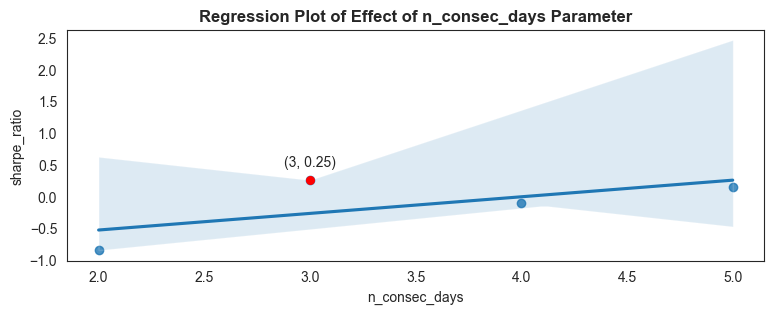

In [ ]:
fig, ax = plt.subplots(figsize=(9, 3))

sns.regplot(data=results_df, x="n_consec_days", y="sharpe_ratio")

largest_sr = results_df[results_df["sharpe_ratio"] == results_df["sharpe_ratio"].max()]
plt.scatter(largest_sr["n_consec_days"], largest_sr["sharpe_ratio"], color="red", s=30, label="Optimal")
for x, y in zip(largest_sr["n_consec_days"], largest_sr["sharpe_ratio"]):
    plt.annotate(f"({int(x)}, {y:.2f})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Regression Plot of Effect of n_consec_days Parameter", fontsize=12, fontweight="bold")

plt.show()

In [ ]:
results_df = pd.DataFrame(columns=["window", "sharpe_ratio"])

for x in range(3, 24, 2):
    A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
    A.set_strategy_parameters(n_consec_days, x, rsi_ob, rsi_os, x, soi_ob, soi_os, days_to_hold, take_profit, stop_loss)
    A.run_strategy()
    A.compute_additional_statistics()
    results = A.performance()
    results_array = [x, results[8]]
    results_df.loc[len(results_df)] = results_array

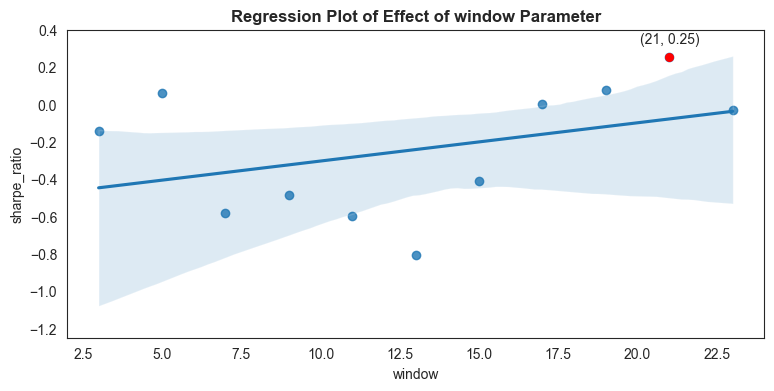

In [ ]:
fig, ax = plt.subplots(figsize=(9, 4))

sns.regplot(data=results_df, x="window", y="sharpe_ratio")

largest_sr = results_df[results_df["sharpe_ratio"] == results_df["sharpe_ratio"].max()]
plt.scatter(largest_sr["window"], largest_sr["sharpe_ratio"], color="red", s=30, label="Optimal")
for x, y in zip(largest_sr["window"], largest_sr["sharpe_ratio"]):
    plt.annotate(f"({int(x)}, {y:.2f})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Regression Plot of Effect of window Parameter", fontsize=12, fontweight="bold")
plt.ylim(-1.25, 0.4)

plt.show()

In [ ]:
results_df = pd.DataFrame(columns=["rsi_ob", "rsi_os", "sharpe_ratio"])

for ob in range(55, 85, 5):
    for os in range(20, 50, 5):
        A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
        A.set_strategy_parameters(n_consec_days, window, ob, os, window, soi_ob, soi_os, days_to_hold, take_profit, stop_loss)
        A.run_strategy()
        A.compute_additional_statistics()
        results = A.performance()
        results_array = [ob, os, results[8]]
        results_df.loc[len(results_df)] = results_array

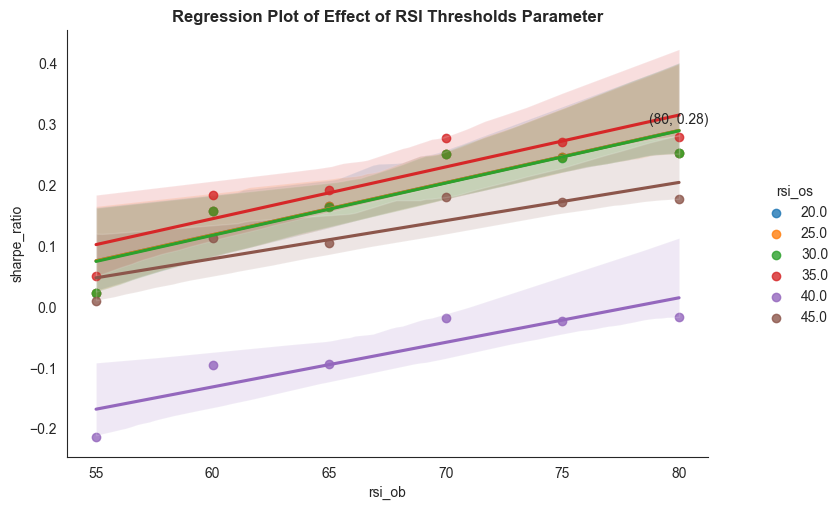

In [ ]:
g = sns.lmplot(data=results_df, x="rsi_ob", y="sharpe_ratio", hue="rsi_os")

fig = g.fig
ax = g.ax
fig.set_size_inches(9, 5)

largest_sr = results_df[results_df["sharpe_ratio"] == results_df["sharpe_ratio"].max()]
for x, y in zip(largest_sr["rsi_ob"], largest_sr["sharpe_ratio"]):
    ax.annotate(f"({int(x)}, {y:.2f})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Regression Plot of Effect of RSI Thresholds Parameter", fontsize=12, fontweight="bold")

plt.show()

In [ ]:
results_df = pd.DataFrame(columns=["soi_ob", "soi_os", "sharpe_ratio"])

for ob in range(55, 85, 5):
    for os in range(20, 50, 5):
        A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
        A.set_strategy_parameters(n_consec_days, window, 80, 35, window, ob, os, days_to_hold, take_profit, stop_loss)
        A.run_strategy()
        A.compute_additional_statistics()
        results = A.performance()
        results_array = [ob, os, results[8]]
        results_df.loc[len(results_df)] = results_array

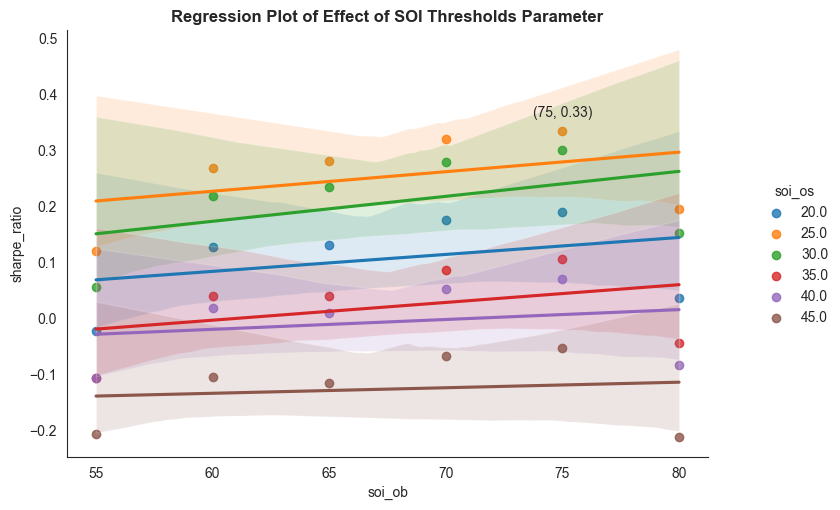

In [ ]:
g = sns.lmplot(data=results_df, x="soi_ob", y="sharpe_ratio", hue="soi_os")

fig = g.fig
ax = g.ax
fig.set_size_inches(9, 5)

largest_sr = results_df[results_df["sharpe_ratio"] == results_df["sharpe_ratio"].max()]
for x, y in zip(largest_sr["soi_ob"], largest_sr["sharpe_ratio"]):
    ax.annotate(f"({int(x)}, {y:.2f})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Regression Plot of Effect of SOI Thresholds Parameter", fontsize=12, fontweight="bold")

plt.show()

In [ ]:
results_df = pd.DataFrame(columns=["days_to_hold", "sharpe_ratio"])

for x in range(2, 7):
    A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
    A.set_strategy_parameters(n_consec_days, window, 80, 35, window, 75, 25, x, take_profit, stop_loss)
    A.run_strategy()
    A.compute_additional_statistics()
    results = A.performance()
    results_array = [x, results[8]]
    results_df.loc[len(results_df)] = results_array

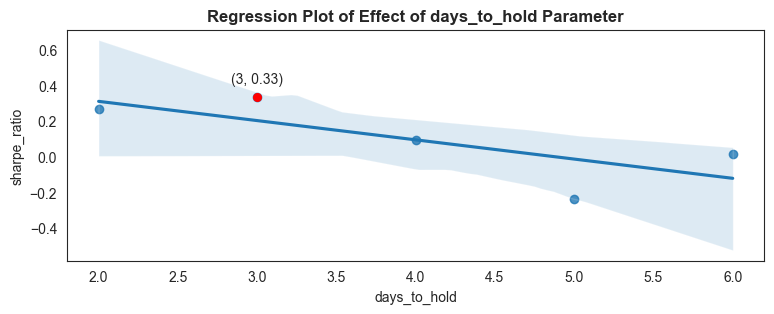

In [ ]:
fig, ax = plt.subplots(figsize=(9, 3))

sns.regplot(data=results_df, x="days_to_hold", y="sharpe_ratio")

largest_sr = results_df[results_df["sharpe_ratio"] == results_df["sharpe_ratio"].max()]
plt.scatter(largest_sr["days_to_hold"], largest_sr["sharpe_ratio"], color="red", s=30, label="Optimal")
for x, y in zip(largest_sr["days_to_hold"], largest_sr["sharpe_ratio"]):
    plt.annotate(f"({int(x)}, {y:.2f})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Regression Plot of Effect of days_to_hold Parameter", fontsize=12, fontweight="bold")

plt.show()

In [ ]:
tp_results_df = pd.DataFrame(columns=["take_profit", "sharpe_ratio"])
sl_results_df = pd.DataFrame(columns=["stop_loss", "sharpe_ratio"])

for x in np.arange(0.05, 0.3, 0.05):
    A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
    A.set_strategy_parameters(n_consec_days, window, 80, 35, window, 75, 25, 2, x, stop_loss)
    A.run_strategy()
    A.compute_additional_statistics()
    results = A.performance()
    results_array = [x, results[8]]
    tp_results_df.loc[len(tp_results_df)] = results_array

for x in np.arange(0.05, 0.3, 0.05):
    A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
    A.set_strategy_parameters(n_consec_days, window, 80, 35, window, 75, 25, 2, take_profit, x)
    A.run_strategy()
    A.compute_additional_statistics()
    results = A.performance()
    results_array = [x, results[8]]
    sl_results_df.loc[len(sl_results_df)] = results_array

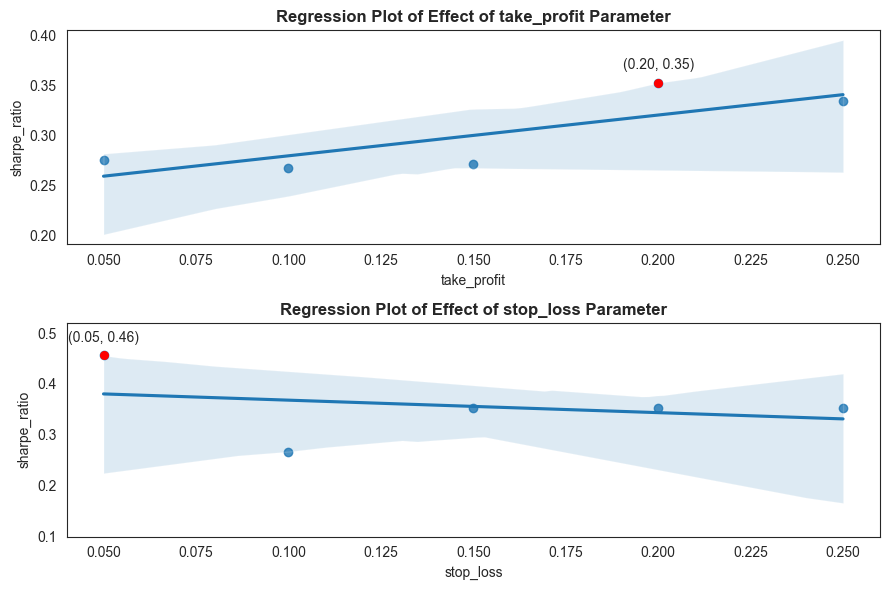

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(9,6))

sns.regplot(data=tp_results_df, x="take_profit", y="sharpe_ratio", ax=axes[0])
sns.regplot(data=sl_results_df, x="stop_loss", y="sharpe_ratio", ax=axes[1])

tp_largest_sr = tp_results_df[tp_results_df["sharpe_ratio"] == tp_results_df["sharpe_ratio"].max()]
axes[0].scatter(tp_largest_sr["take_profit"], tp_largest_sr["sharpe_ratio"], color="red", s=30, label="Optimal")
for x, y in zip(tp_largest_sr["take_profit"], tp_largest_sr["sharpe_ratio"]):
    axes[0].annotate(f"({x:.2f}, {y:.2f})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')
axes[0].set_title("Regression Plot of Effect of take_profit Parameter", fontsize=12, fontweight="bold")

sl_largest_sr = sl_results_df[sl_results_df["sharpe_ratio"] == sl_results_df["sharpe_ratio"].max()]
axes[1].scatter(sl_largest_sr["stop_loss"], sl_largest_sr["sharpe_ratio"], color="red", s=30, label="Optimal")
for x, y in zip(sl_largest_sr["stop_loss"], sl_largest_sr["sharpe_ratio"]):
    axes[1].annotate(f"({x:.2f}, {y:.2f})", (x, y), textcoords="offset points", xytext=(0,10), ha='center')
axes[1].set_title("Regression Plot of Effect of stop_loss Parameter", fontsize=12, fontweight="bold")
axes[1].set_ylim(0.1, 0.52)

plt.tight_layout()
plt.show()

In [ ]:
symbol = ["PLD", "EL", "AMZN", "PFE", "SPWR", "NFLX"]
beta = [1.30, 0.99, 1.10, 0.80, 1.82, 1.04]
benchmark = "SPY"
start = "2010-01-01"
end = "2016-12-31"
interval = "1d"
capital = 500_000
transaction_cost = 100
verbose = False

# Optimal values from comprehensive grid search conducted earlier
n_consec_days = 3
window = 21
rsi_ob, rsi_os = 80, 35
soi_ob, soi_os = 75, 25
days_to_hold = 3
take_profit, stop_loss = 0.2, 0.05

A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
A.set_strategy_parameters(n_consec_days, window, rsi_ob, rsi_os, window, soi_ob, soi_os, days_to_hold, take_profit, stop_loss)
A.run_strategy()
A.compute_additional_statistics()
sharpe_ratio = A.performance()[8]
print("Optimal Sharpe Ratio: ", sharpe_ratio)

Optimal Sharpe Ratio:  0.481706434873867


### Section 4: Test Period
With the optimal parameters identified, we try out the strategy on the test period, and report the performance metrics along with the performance plots below.

In [ ]:
symbol = ["PLD", "EL", "AMZN", "PFE", "SPWR", "NFLX"]
beta = [1.30, 0.99, 1.10, 0.80, 1.82, 1.04]
benchmark = "SPY"
start = "2017-01-01"
end = "2019-12-31"
interval = "1d"
capital = 500_000
transaction_cost = 100
verbose = True

n_consec_days = 3
window = 21
rsi_ob, rsi_os = 80, 35
soi_ob, soi_os = 75, 25
days_to_hold = 3
take_profit, stop_loss = 0.2, 0.05

A = RSI_SOI_Strategy(symbol, beta, benchmark, start, end, interval, capital, transaction_cost, verbose)
A.set_strategy_parameters(n_consec_days, window, rsi_ob, rsi_os, window, soi_ob, soi_os, days_to_hold, take_profit, stop_loss)
A.run_strategy()
A.compute_additional_statistics()

Bought 523 shares of NFLX at 141.0 per share worth 73727.3 $
Date: 2017-02-06 | Realised Balance: 426172.69
Date: 2017-02-06 | Unrealised Balance: 73727.31
Date: 2017-02-06 | Total Balance: 499900.00
Sold 2262 shares of PLD at 40.8 per share worth 92194.2 $
Date: 2017-02-07 | Realised Balance: 518266.84
Date: 2017-02-07 | Unrealised Balance: -16882.15
Date: 2017-02-07 | Total Balance: 501384.69
Sold 523 shares of NFLX at 144.1 per share worth 75385.2 $
Date: 2017-02-09 | Realised Balance: 593552.06
Date: 2017-02-09 | Unrealised Balance: -93499.56
Date: 2017-02-09 | Total Balance: 500052.50
Bought 2262 shares of PLD at 41.9 per share worth 94805.0 $
Date: 2017-02-10 | Realised Balance: 498647.05
Date: 2017-02-10 | Unrealised Balance: 0.00
Date: 2017-02-10 | Total Balance: 498647.05
Bought 903 shares of EL at 77.7 per share worth 70172.8 $
Date: 2017-02-14 | Realised Balance: 428374.25
Date: 2017-02-14 | Unrealised Balance: 70172.80
Date: 2017-02-14 | Total Balance: 498547.05
Bought 2324

In [ ]:
np.divide(beta, sum(beta))

array([0.18439716, 0.14042553, 0.15602837, 0.11347518, 0.25815603,
       0.14751773])

In [ ]:
results = A.performance()

The total capital at the end of strategy: $399461.36
The returns on investment from 2017-01-01 to 2019-12-31 by this strategy is -0.20
The maximum drawdown: 31.47%
The maximum drawdown period: 125.00
The annual regular returns: -7.46%
The annual regular standard deviation: 0.10
The beta of the strategy: -0.14
The alpha of the strategy: -0.05
The annual Sharpe Ratio: -0.72
The annual Calmar Ratio: -0.24
The annual Sortino Ratio: -1.00
The annual Treynor Ratio: 0.53
The annual Information Ratio: -1.23
The total trades made by the strategy: 727


In [ ]:
equal_weight_results = A.performance("equal_weight")

The total capital at the end of strategy: $1029374.84
The returns on investment from 2017-01-01 to 2019-12-31 by this strategy is 1.06
The maximum drawdown: 44.79%
The maximum drawdown period: 123.00
The annual regular returns: 28.31%
The annual regular standard deviation: 0.20
The beta of the strategy: 1.19
The alpha of the strategy: 0.10
The annual Sharpe Ratio: 1.39
The annual Calmar Ratio: 0.63
The annual Sortino Ratio: 2.07
The annual Treynor Ratio: 0.24
The annual Information Ratio: 1.01
The total trades made by the strategy: 727


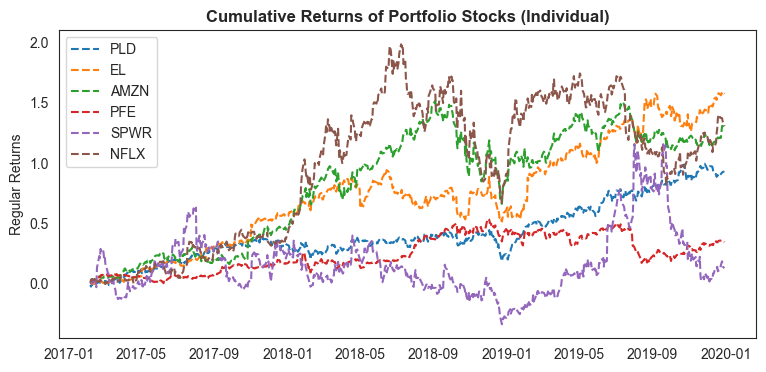

In [ ]:
A.cumulative_returns_plot()

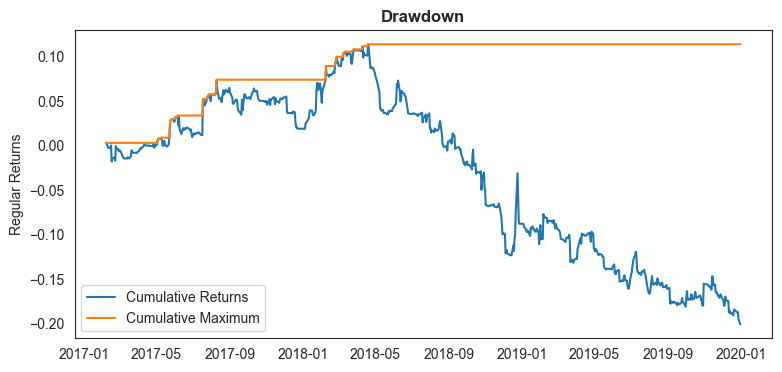

In [ ]:
A.drawdown_plot()

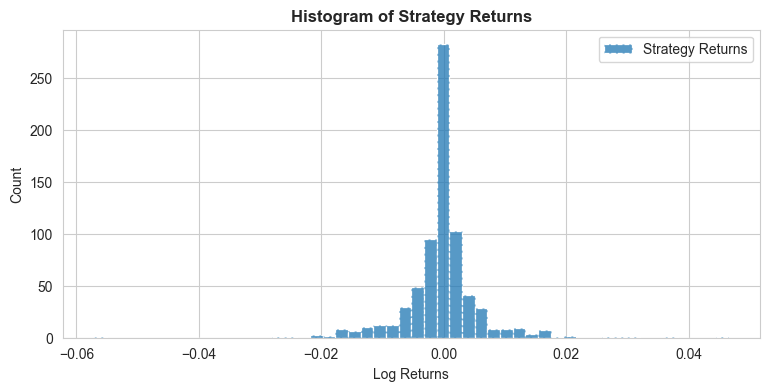

In [ ]:
A.strategy_returns_histogram()

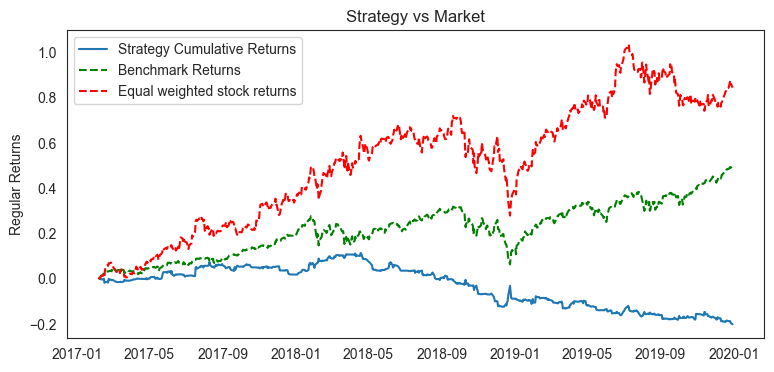

In [ ]:
A.strategy_vs_benchmark_plot()

In [ ]:
A.winning_losing_positions

{'winning': {'long': {'PLD': 36,
   'EL': 47,
   'AMZN': 49,
   'PFE': 37,
   'SPWR': 15,
   'NFLX': 22},
  'short': {'PLD': 2, 'EL': 7, 'AMZN': 10, 'PFE': 9, 'SPWR': 23, 'NFLX': 9}},
 'losing': {'long': {'PLD': 33,
   'EL': 21,
   'AMZN': 21,
   'PFE': 17,
   'SPWR': 16,
   'NFLX': 21},
  'short': {'PLD': 11,
   'EL': 10,
   'AMZN': 11,
   'PFE': 12,
   'SPWR': 17,
   'NFLX': 13}},
 'neutral': {'long': {'PLD': 0,
   'EL': 0,
   'AMZN': 0,
   'PFE': 1,
   'SPWR': 0,
   'NFLX': 0},
  'short': {'PLD': 0, 'EL': 0, 'AMZN': 0, 'PFE': 0, 'SPWR': 0, 'NFLX': 0}}}